___
# O número de assassinatos e a taxa de fertilidade jovem de um país se relacionam com o IDH?
___

**Preparo Prévio:**
1. Aulas 1, 2, 3 e 4 de Ciência dos Dados





___

##  IDH, taxa de natalidade entre jovens e assassinatos a cada 100 mil pessoas

Foram coletados três dados do site https://www.gapminder.org/:
1. Índice de desenvolvimento humano
2. Número de nascimentos a cada 100 mil habitantes entre jovens de 15 a 19 anos
3. Número de assassinatos a cada 100 mil habitantes

Nesses *dataframes*, as linhas representam os países, as colunas representam o ano.

No *dataframe* *idh* criado a seguir, o conteúdo de cada célula é o valor do IDH de um determinado ano (coluna) para determinado país (linha). 

No *dataframe* *death* criado a seguir, o conteúdo de cada célula é o número de assassinatos a cada 100 mil pessoas de um determinado ano (coluna) para um determinado país (linha). 

No *dataframe* *birth* criado a seguir, o conteúdo de cada célula é o número de nascimentos a cada 100 mil pessoas para mulheres entre 15 e 19 anos de um determinado ano (coluna) para determinado país (linha). 

Como os arquivos estão separados, será preciso juntá-los cruzando o país.

___

### Leitura dos arquivos e mudança de índices

In [59]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

Leitura dos arquivos em excel:

In [60]:


idh = pd.read_excel('idh_final.xlsx')
death = pd.read_excel('homicidios.xlsx')
birth= pd.read_excel('fertilidade.xlsx')

## Índice de desenvolvimento humano

É possível verificar que cada linha é um país e cada coluna um ano:

In [61]:
idh.head(10)

,IDH,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.781,0.786,0.788,0.783,0.782,0.778,0.781,0.782,0.784,0.786
6,Argentina,0.705,0.713,0.720,0.725,0.728,0.731,0.738,0.746,0.753,...,0.788,0.792,0.794,0.802,0.816,0.822,0.823,0.825,0.826,0.827
7,Armenia,0.634,0.628,0.595,0.593,0.597,0.603,0.609,0.618,0.632,...,0.707,0.721,0.725,0.720,0.729,0.732,0.736,0.739,0.741,0.743
8,Australia,0.866,0.867,0.871,0.874,0.876,0.885,0.888,0.891,0.894,...,0.918,0.921,0.925,0.927,0.927,0.930,0.933,0.936,0.937,0.939
9,Austria,0.794,0.798,0.804,0.806,0.812,0.816,0.819,0.823,0.833,...,0.860,0.864,0.870,0.872,0.880,0.884,0.887,0.892,0.892,0.893


## Taxa de natalidade entre adolescentes

O mesmo pode ser feito com o número de nascimentos para jovens mulheres:

In [62]:
birth.head(10)

,Fertilidade,1753,1754,1755,1756,1757,1758,1759,1760,1761,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,171.00,161.00,153.0,144.00,136.00,127.00,119.00,115.00,111.00,107.00
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.50,16.3,14.60,16.20,12.90,11.20,11.20,11.20,11.20
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.19,8.54,8.3,8.06,7.82,7.58,7.34,7.09,6.84,6.58
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.80,7.5,5.30,NaN,11.10,7.30,8.90,5.10,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,204.00,201.00,195.0,189.00,183.00,177.00,171.00,167.00,162.00,157.00
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.00,61.50,57.5,63.70,63.80,63.00,64.50,67.40,68.20,68.20
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28.20,29.4,29.60,26.80,25.70,26.40,27.20,29.40,28.30
8,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.70,17.40,16.3,16.30,15.60,14.90,15.40,16.80,16.40,15.50
9,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.40,13.60,13.0,13.60,12.80,11.90,11.20,11.20,10.30,9.96


## Assassinatos por ano a cada 100 mil pessoas

Também é possível fazer isso com a quantidade de homícios por ano, a cada 100 mil pessoas:

In [63]:
death.head(10)

,Homicídios,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.650,NaN,3.840,3.840
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.970,8.120,6.680,7.330
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13.100,14.400,9.810,4.390
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.767,NaN,0.727,0.727
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.100,NaN,48.200,48.200
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.800,NaN,7.490,7.490
6,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.74,4.96,4.90,5.450,5.970,7.110,7.710,7.410,5.880,5.250
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.560,3.260,3.210,2.350
8,Australia,1.02,1.33,1.46,1.25,1.3,1.390,1.31,1.35,1.540,...,1.74,1.68,1.56,1.550,1.590,1.580,1.470,1.320,0.780,0.780
9,Austria,NaN,NaN,NaN,NaN,NaN,0.975,1.58,1.20,0.965,...,1.13,0.88,1.09,0.809,0.875,0.944,0.848,0.607,0.708,0.809


## Inner Join


Agora, juntaremos as três tabelas e removeremos os NaNs, além de selecionar o ano de 2005. A razão para tal escolha é que, dentre os períodos que possuem as informações dos três tópicos, ele é o mais recente.
Ao final, vamos fazer o gráfico de dispersão das duas variáveis.

Mantendo somente para o ano de 2005:

In [64]:


idh_2005 = idh.loc[:,["IDH",2005]]
birth_2005 = birth.loc[:, ["Fertilidade",2005]]
death_2005 = death.loc[:, ["Homicídios",2005]]



Alterando os índices:

In [65]:


idh_idx = idh_2005.set_index('IDH')
birth_idx = birth_2005.set_index('Fertilidade')
death_idx = death_2005.set_index('Homicídios')



Removendo os "NaNs":

In [66]:
idh_idx.dropna(inplace=True)
death_idx.dropna(inplace= True)
birth_idx.dropna(inplace= True)

In [67]:
death_idx.head(10)



,2005
Homicídios,
Afghanistan,3.840
Albania,7.330
Algeria,4.390
Andorra,0.727
Angola,48.200
Antigua and Barbuda,7.490
Argentina,5.250
Armenia,2.350
Australia,0.780


In [68]:
birth_idx.head(10)

,2005
Fertilidade,
Afghanistan,136.00
Albania,16.20
Algeria,7.82
Angola,183.00
Argentina,63.80
Armenia,26.80
Australia,15.60
Austria,12.80
Azerbaijan,33.80


Colocando idh e fertilidade na mesma tabela:

In [69]:


df = idh_idx.join(birth_idx, how='inner', lsuffix='_IDH', rsuffix='_Fertilidade')
df.head(10)

,2005_IDH,2005_Fertilidade
Afghanistan,0.405,136.00
Albania,0.696,16.20
Algeria,0.686,7.82
Angola,0.439,183.00
Argentina,0.782,63.80
Armenia,0.692,26.80
Australia,0.915,15.60
Austria,0.854,12.80
Azerbaijan,0.682,33.80
Bahamas,0.788,36.70


Agora juntamos o restante dos dados com a tabela obtida:

In [70]:

data = df.join(death_idx, how='inner', lsuffix='_IDH', rsuffix='_Fertilidade')
data.columns = ['2005_IDH','2005_Fertilidade','2005_Mortalidade']

In [71]:
data.head(10)

,2005_IDH,2005_Fertilidade,2005_Mortalidade
Afghanistan,0.405,136.00,3.840
Albania,0.696,16.20,7.330
Algeria,0.686,7.82,4.390
Angola,0.439,183.00,48.200
Argentina,0.782,63.80,5.250
Armenia,0.692,26.80,2.350
Australia,0.915,15.60,0.780
Austria,0.854,12.80,0.809
Azerbaijan,0.682,33.80,2.690
Bahamas,0.788,36.70,17.100



##  Gráficos de dispersão e correlações


A partir dos dados obtidos sobre o ano de 2005, podemos fazer uma comparação gráfica do IDH de cada país com as outras duas variáveis. A partir da disposição dos pontos no gráfico, é possível calcular o quão correlacionados estão as duas variáveis escolhidas. Quanto mais perto de 1 ou -1, maior é a correlação.

Abaixo, o gráfico de dispersão do IDH com a fertilidade, sendo eles, respectivamente, a abscissa e a coordenada:

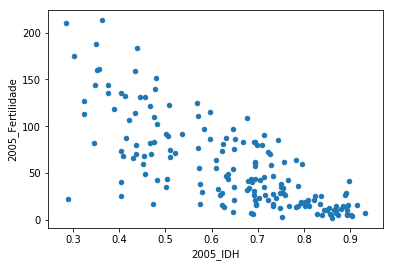

In [72]:
data.plot.scatter(x="2005_IDH", y="2005_Fertilidade")

Calculando a correlação entre os dois, obtemos o valor aproximado de -0.75:

In [73]:
data["2005_IDH"].corr(data["2005_Fertilidade"])


-0.7535794900098547

Agora podemos colocar a reta de tedência deste gráfico, com a ajuda de uma função em python:

In [74]:
def reta(dados_x, dados_y, nome_x = "Eixo X", nome_y = "Eixo Y"):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

Ajuste linear entre  Eixo X   e  Eixo Y :
Coeficiente linear: 192.8989742931105
Coeficiente angular: -210.17810150808907


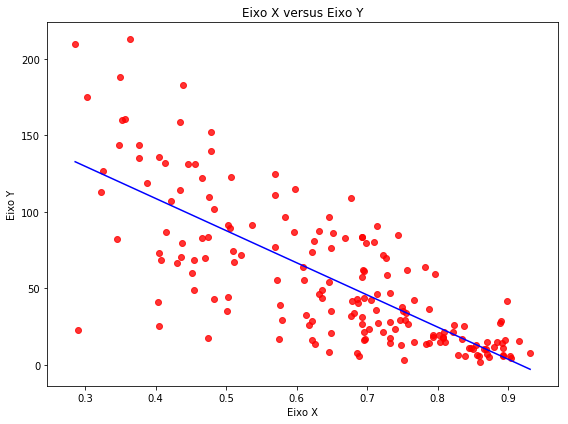

In [75]:
reta(data["2005_IDH"], data["2005_Fertilidade"])

Agora fazemos o mesmo com a mortalidade, substituindo essa variável no lugar da fertilidade no código:

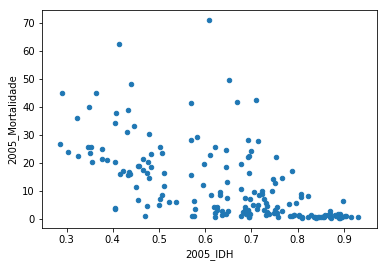

In [76]:

data.plot.scatter(x="2005_IDH", y="2005_Mortalidade")

Também calculamos a correlação, chegando ao valor de -0.60, aproximadamente:

In [77]:
data["2005_IDH"].corr(data["2005_Mortalidade"])


-0.6027825100533891

Além disso, fazemos a reta de tendência do novo gráfico:

Ajuste linear entre  Eixo X   e  Eixo Y :
Coeficiente linear: 192.8989742931105
Coeficiente angular: -210.17810150808907


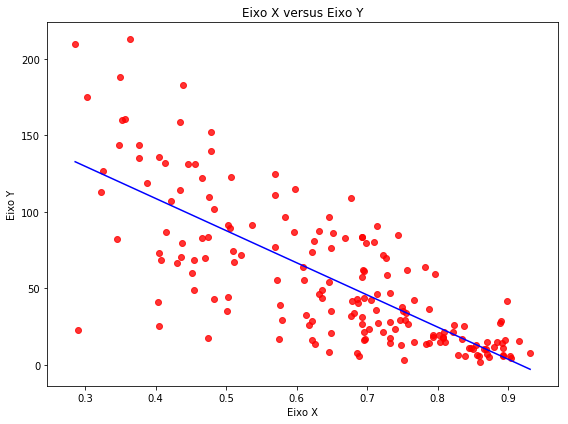

In [78]:
reta(data["2005_IDH"], data["2005_Fertilidade"])

## Avaliação de 2002


Agora repetiremos todo o processo para o ano de 2002, de modo a comparar os dados obtidos com os do ano de 2005.

## Inner Join

Agora, juntaremos as três tabelas e removeremos os NaNs, além de selecionar o ano de 2002. Ao final vamos fazer o gráfico de dispersão das duas variáveis.

Mantendo só para o ano de 2002:

In [79]:
idh_2002 = idh.loc[:,["IDH",2002]]
birth_2002 = birth.loc[:, ["Fertilidade",2002]]
death_2002 = death.loc[:, ["Homicídios",2002]]



Alterando os índices:

In [80]:
idh_idx2 = idh_2002.set_index("IDH")
birth_idx2 =birth_2002.set_index("Fertilidade")
death_idx2 =death_2002.set_index("Homicídios")


Removendo os "NaNs":

In [81]:
idh_idx2.dropna(inplace=True)
death_idx2.dropna(inplace= True)
birth_idx2.dropna(inplace= True)

In [82]:
death_idx2.head(10)

,2002
Homicídios,
Afghanistan,4.650
Albania,5.970
Algeria,13.100
Andorra,0.767
Angola,51.100
Antigua and Barbuda,10.800
Argentina,7.710
Armenia,3.560
Australia,1.470


In [83]:
birth_idx2.head(10)

,2002
Fertilidade,
Afghanistan,161.00
Albania,14.50
Algeria,8.54
Andorra,6.80
Angola,201.00
Argentina,61.50
Armenia,28.20
Australia,17.40
Austria,13.60


In [84]:
df2 = idh_idx2.join(birth_idx2, how='inner', lsuffix='_IDH', rsuffix='_Fertilidade')
df2.head(10)

,2002_IDH,2002_Fertilidade
Afghanistan,0.373,161.00
Albania,0.674,14.50
Algeria,0.663,8.54
Angola,0.406,201.00
Argentina,0.770,61.50
Armenia,0.657,28.20
Australia,0.905,17.40
Austria,0.837,13.60
Azerbaijan,0.659,33.60
Bahamas,0.783,44.00


Agora juntamos o restante dos dados com a tabela:

In [85]:
data2 = df2.join(death_idx2, how='inner', lsuffix='_IDH', rsuffix='_Fertilidade')
data2.columns = ['2002_IDH','2002_Fertilidade','2002_Mortalidade']

In [86]:
data2.head(10)

,2002_IDH,2002_Fertilidade,2002_Mortalidade
Afghanistan,0.373,161.00,4.650
Albania,0.674,14.50,5.970
Algeria,0.663,8.54,13.100
Angola,0.406,201.00,51.100
Argentina,0.770,61.50,7.710
Armenia,0.657,28.20,3.560
Australia,0.905,17.40,1.470
Austria,0.837,13.60,0.848
Azerbaijan,0.659,33.60,3.000
Bahamas,0.783,44.00,21.000


## Gráficos de dispersão e correlação para o ano de 2002

A partir dos dados obtidos sobre o ano de 2002, podemos fazer uma comparação gráfica do IDH de cada país com as outras duas variáveis. A partir da disposição dos pontos no gráfico, é possível calcular o quão correlacionados estão as duas variáveis escolhidas. Quanto mais perto de 1 ou -1, maior é a correlação.

Abaixo, o gráfico de dispersão do IDH com a fertilidade para o ano de 2002, sendo eles, respectivamente, a abscissa e a coordenada:

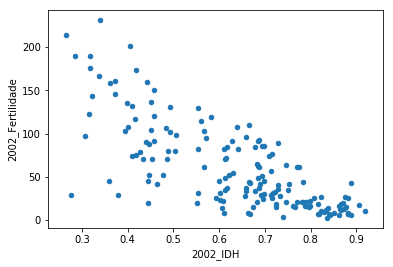

In [96]:
data2.plot.scatter(x="2002_IDH", y="2002_Fertilidade")

Calculando a correlação entre as duas variáveis, encontramos o valor aproximado de -0.75, muito próximo ao encontrado no ano de 2005:

In [97]:
data2["2002_IDH"].corr(data2["2002_Fertilidade"])

-0.7538932928331046

Agora podemos colocar a reta de tendência no gráfico de dispersão, com o auxílio de uma função em Python:

In [98]:
def reta(dados_x, dados_y, nome_x = "Eixo X", nome_y = "Eixo Y"):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre ',nome_x,'  e ',nome_y,':')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(nome_x + " versus "+ nome_y)
    plt.xlabel(nome_x)
    plt.ylabel(nome_y)

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()

Ajuste linear entre  Eixo X   e  Eixo Y :
Coeficiente linear: 202.05619319456088
Coeficiente angular: -223.67733752996477


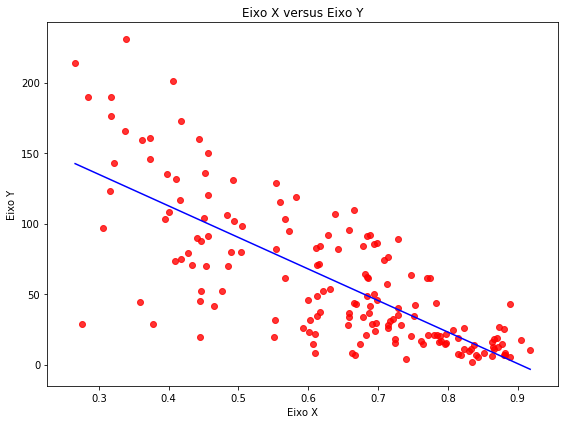

In [99]:
reta(data2["2002_IDH"], data2["2002_Fertilidade"])

Agora fazemos o mesmo com a mortalidade de 2002, substituindo essa variável no lugar da fertilidade no código:

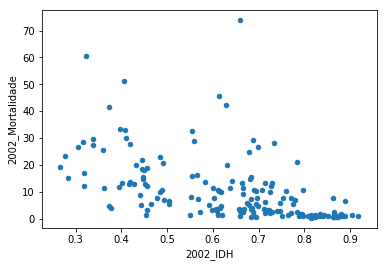

In [100]:
data2.plot.scatter(x="2002_IDH", y="2002_Mortalidade")

Agora calculamos a correlação entre os dois, chegando ao valor aproximado de -0.52, diferente ao do ano de 2005, avaliado em -0.6, aproximadamente:

In [101]:
data2["2002_IDH"].corr(data2["2002_Mortalidade"])

-0.525738558970934

Além disso, fazemos a reta tendência do novo gráfico:

Ajuste linear entre  Eixo X   e  Eixo Y :
Coeficiente linear: 34.273995018070785
Coeficiente angular: -37.355079901725155


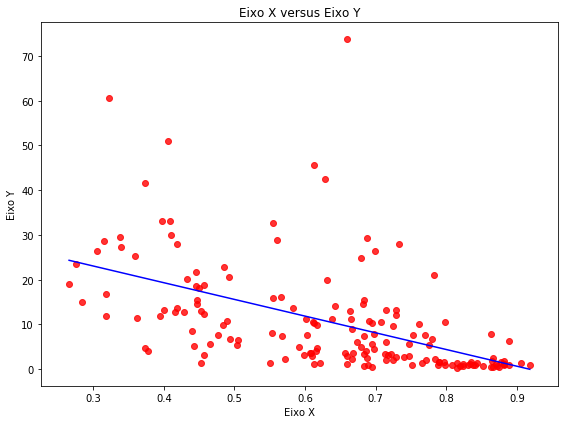

In [102]:
reta(data2["2002_IDH"], data2["2002_Mortalidade"])

## Conclusões


Com base no que foi exposto, pode-se inferir que há sim uma relação de causa e consequência dos fatores listados com o índice de desenvolvimento humano. Embora não sejam os únicos aspectos importantes, a fertilidade média de jovens e o número de assassinatos possuem uma influência considerável. No entanto, pode- se notar a partir dos índices de correlação diferentes que os dois aspectos não possuem a mesma influencia, sendo a fertilidade média de jovens um fator mais relevante.
O número médio de asassinatos de cada país se relaciona com o IDH de maneira bem intuitiva: quanto mais homicídios, mais perigoso o lugar, assim diminuindo a expectativa de vida. Quanto à diferença entre as correlações dos anos de 2002 e 2005, podemos inferir que a razão por tras desse ocorrido se deve ao maior número de conflitos armados no ano de 2005, assim como sua maior intensidade.
Já no caso de ter filhos em uma idade jovem, isso aumenta mais as chances de um país ter um IDH baixo, já que muitas vezes os pais não têm condições financeiras de educar todas as crianças, afetando o nível de escolaridade médio. Além disso, muitas vezes as mães não conseguem terminar seus estudos, por conta de estarem ocupadas demais com seus filhos, o que diminui o nível de escolaridade médio. Consequentemente, a renda média do país, que é outro quesito levado em consideração para elaborar o IDH, é afetada. Já que os país não conseguem estudar por muito tempo e nem providenciar uma edução de maior qualidade para seus filhos, a produtividade de ambos os grupos permanece baixa, fazendo com que a renda que eles possam vir a obter seja mais baixa. Assim, a taxa de natalidade entre jovens é mais influente por estar envolvida em mais fatores utilizados para elaborar o IDH do que a taxa de homicídios.


